In [1]:
import pandas as pd

# Membaca data dari CSV
colors_df = pd.read_csv('colors.csv')

# Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
colors_df.head()


,color_name,description,color_code,r,g,b
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


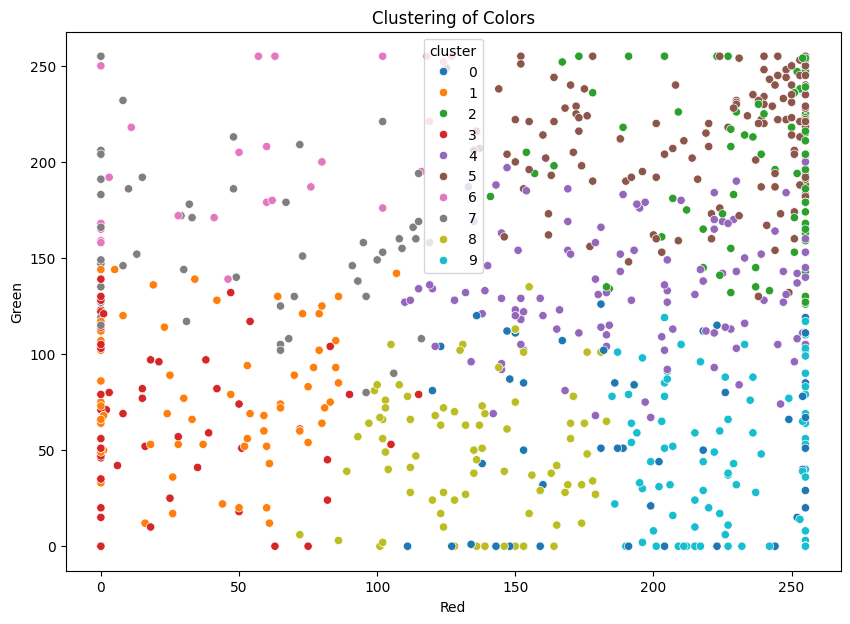

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan data RGB
rgb_values = colors_df[['r', 'g', 'b']].values

# Menggunakan K-Means untuk mengelompokkan warna
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(rgb_values)

# Menambahkan label cluster ke DataFrame
colors_df['cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=colors_df['r'], y=colors_df['g'], hue=colors_df['cluster'], palette='tab10')
plt.title('Clustering of Colors')
plt.xlabel('Red')
plt.ylabel('Green')
plt.show()


In [3]:
from sklearn.neighbors import NearestNeighbors

# Menggunakan Nearest Neighbors untuk mencari warna yang paling mirip
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(rgb_values)

# Fungsi untuk mendapatkan rekomendasi warna berdasarkan input RGB
def get_color_recommendations(input_rgb, n_recommendations=5):
    distances, indices = nbrs.kneighbors([input_rgb])
    recommended_colors = colors_df.iloc[indices[0]]
    return recommended_colors

# Contoh penggunaan fungsi rekomendasi
input_rgb = [240, 248, 255]  # Warna input contoh
recommended_colors = get_color_recommendations(input_rgb)
recommended_colors


,color_name,description,color_code,r,g,b,cluster
4,alice_blue,Alice Blue,#f0f8ff,240,248,255,5
35,azure_mist_web,Azure Mist/Web,#f0ffff,240,255,255,5
330,ghost_white,Ghost White,#f8f8ff,248,248,255,5
463,magnolia,Magnolia,#f8f4ff,248,244,255,5
509,mint_cream,Mint Cream,#f5fffa,245,255,250,5


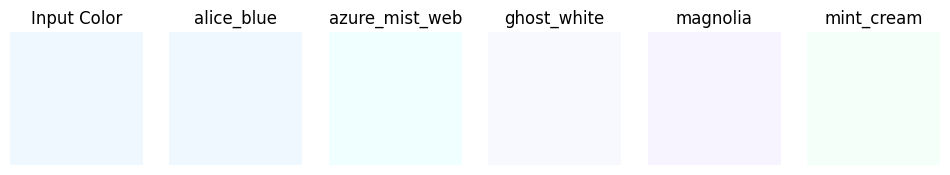

In [4]:
# Visualisasi warna input dan rekomendasi
def plot_color_recommendations(input_rgb, recommended_colors):
    plt.figure(figsize=(12, 2))
    
    # Warna input
    plt.subplot(1, 6, 1)
    plt.imshow([[input_rgb]])
    plt.title('Input Color')
    plt.axis('off')
    
    # Warna rekomendasi
    for i, (_, row) in enumerate(recommended_colors.iterrows()):
        plt.subplot(1, 6, i + 2)
        plt.imshow([[(row['r'], row['g'], row['b'])]])
        plt.title(row['color_name'])
        plt.axis('off')
    
    plt.show()

# Plot warna input dan rekomendasi
plot_color_recommendations(input_rgb, recommended_colors)


In [5]:
import pickle

# Simpan model K-Means
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Simpan model Nearest Neighbors
with open('nearest_neighbors_model.pkl', 'wb') as f:
    pickle.dump(nbrs, f)


In [6]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
sil_score = silhouette_score(rgb_values, kmeans.labels_)
print(f'Silhouette Score for K-Means Clustering: {sil_score:.2f}')


Silhouette Score for K-Means Clustering: 0.30


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Fungsi untuk mendapatkan MSE dari rekomendasi warna
def calculate_mse(input_rgb):
    recommended_colors = get_color_recommendations(input_rgb)
    recommended_rgb = recommended_colors[['r', 'g', 'b']].values
    mse = mean_squared_error([input_rgb] * len(recommended_rgb), recommended_rgb)
    return mse

# Contoh perhitungan MSE untuk beberapa warna input
input_colors = [
    [240, 248, 255],  # Alice Blue
    [163, 38, 56],    # Alabama Crimson
    [93, 138, 168]    # Air Force Blue (RAF)
]

mse_scores = [calculate_mse(color) for color in input_colors]
avg_mse = np.mean(mse_scores)
print(f'Average Mean Squared Error for Nearest Neighbors Recommendations: {avg_mse:.2f}')


NameError: name 'np' is not defined